# 2021 Parteien

In [1]:
import pandas as pd
import numpy as np
import cleandata as cd

In [2]:
df = pd.read_csv('../data/Gemeinde_Exekutive - daten.csv')

## Check Gemeinde without chair

In [3]:
df_t = df.fillna("")
df_t = pd.pivot_table(df_t, index='Gemeinde', columns='Funktion', values='Name', aggfunc='count')
df_t[pd.isna(df_t['chair'])]

Funktion,,chair,school
Gemeinde,,,


## Clean Data

In [4]:
df = cd.clean(df)

Jahrgänge nicht zugeordnet: 15
Partei nicht zugeordnet: 9
Keine Jahrgänge: 21


# Alles über Parteien

## Die grössten Parteien

In [25]:
def nicelify_party(party):
    if party == 'multiple': return "Keine Dominanz"
    if party in ['cvp', 'fdp', 'svp', 'evp', 'edu', 'bdp', 'sp', 'al']: return party.upper()
    if party == 'parteilos': return 'parteilos'
    if party == 'verschiedene': return 'Andere Partei'
    if party == 'grüne': return 'Grüne'
    
    return party

In [26]:
grPartei = df.groupby('partei_c').agg({'Gemeinde': 'count'}).sort_values('Gemeinde', ascending=False).reset_index()

# Remove Vacant
grPartei = grPartei[grPartei.partei_c != 'vacant']

grPartei['Prozent'] = round(100 / df['Gemeinde'].count() * grPartei.Gemeinde, 1)

grPartei['partei_c'] = grPartei['partei_c'].apply(nicelify_party)

grPartei.rename(columns={'Gemeinde': 'Sitze', 'partei_c': 'Partei'}, inplace=True)

grPartei.to_csv('../export/partei.csv', index=False)

grPartei

,Partei,Sitze,Prozent
0,parteilos,366,35.8
1,FDP,221,21.6
2,SVP,202,19.8
3,SP,62,6.1
4,Andere Partei,55,5.4
5,CVP,43,4.2
6,glp,34,3.3
7,EVP,20,2.0
8,Grüne,10,1.0
9,BDP,4,0.4


In [7]:
grPartei['Sitze'].sum()

1019

<AxesSubplot:xlabel='Partei'>

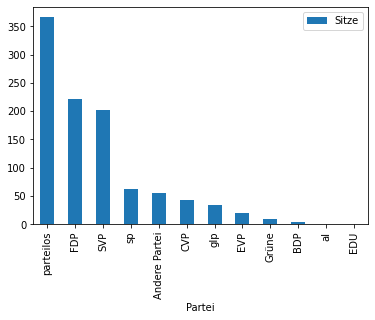

In [8]:
grPartei = grPartei.set_index('Partei')
grPartei.plot.bar(y = 'Sitze')

### In Prozent

In [9]:
grPartei

,Sitze,Prozent
Partei,,
parteilos,366,35.8
FDP,221,21.6
SVP,202,19.8
sp,62,6.1
Andere Partei,55,5.4
CVP,43,4.2
glp,34,3.3
EVP,20,2.0
Grüne,10,1.0


## Die parteilosesten Gemeinden

In [10]:
g = df.copy().groupby(['Gemeinde', 'partei_c']).agg({'Name': 'count'}).reset_index()
g = g.sort_values(['Gemeinde', 'Name'], ascending=[True, False])
g = g.drop_duplicates(['Gemeinde'])
g = g[g.partei_c == 'parteilos'].sort_values('Name', ascending=False)
g = g.rename(columns={'Name': 'Anzahl Parteilose'})
g.head(10)

,Gemeinde,partei_c,Anzahl Parteilose
361,Rifferswil,parteilos,7
99,Dättlikon,parteilos,6
310,Obfelden,parteilos,6
262,Mettmenstetten,parteilos,6
233,Knonau,parteilos,6
473,Weiach,parteilos,5
392,Schöfflisdorf,parteilos,5
401,Stadel,parteilos,5
220,Kappel am Albis,parteilos,5
253,Maschwanden,parteilos,5


In [24]:
g = df.copy().groupby(['Gemeinde', 'partei_c']).agg({'Name': 'count'}).reset_index()
g = pd.pivot_table(g, index='Gemeinde', columns='partei_c', values='Name', aggfunc='sum').fillna(0)
g['sum'] = g.sum(axis=1)
g['%parteilos'] = round(100 / g['sum'] * g['parteilos'])
g = g.sort_values('%parteilos', ascending=False)
len(g[g['%parteilos']  == 100])
#g.head(20)

20

## Die politisch diversesten Gemeinden

In [11]:
g = df.groupby(['Gemeinde', 'partei_c']).count().reset_index()
g = g.groupby('Gemeinde').agg({'partei_c': 'count'})
g = g.sort_values('partei_c', ascending=False).reset_index()
g = g.rename(columns={'partei_c': 'anzahl parteien'})
g.head(10)

,Gemeinde,anzahl parteien
0,Thalwil,6
1,Wallisellen,6
2,Richterswil,6
3,Dietikon,6
4,Schlieren,6
5,Adliswil,6
6,Langnau am Albis,6
7,Urdorf,6
8,Kloten,6
9,Opfikon,6


## Welche Partei stellt das Präsidium?

In [12]:
d = df[df.Funktion == 'chair'].groupby('partei_c').agg({'Gemeinde': 'count'}).sort_values('Gemeinde', ascending=False)
d['%'] = round(100 / d['Gemeinde'].sum() * d['Gemeinde'], 1)
d

,Gemeinde,%
partei_c,,
parteilos,55,34.0
fdp,44,27.2
svp,35,21.6
verschiedene,9,5.6
sp,7,4.3
cvp,5,3.1
evp,4,2.5
glp,3,1.9
